Лабораторная работа №3

Вариант 6

Задание 1

$$ f(x,y)={3\over8\pi}(2- \sqrt{x^2 + y^2}), \forall x, y: x^2 + y^2 \le 4 $$

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spint
import random
import scipy.stats as spst
import sympy as sp

In [108]:
fxy = lambda x,y: (3 / (8 * np.pi)) * (2 - np.sqrt(x**2 + y**2))
fx = lambda x: spint.quad(fxy, -np.sqrt(4 - x ** 2), np.sqrt(4 - x ** 2), args=(x,))[0]
fy = lambda y: spint.quad(fxy, -np.sqrt(4 - y ** 2), np.sqrt(4 - y ** 2), args=(y,))[0]

a = -2
b = 2
f_max = fxy(0, 0)
N = 100000

In [109]:
def neuman_method(a, b, f_max):
    while True:
        x, y = a + random.random() * (b - a), a + random.random() * (b - a) 
        z = random.random() * f_max
        if fxy(x, y) > z and x ** 2 + y ** 2 <= 4:
            yield x, y
            
            
def get_values(n):
    x, y =[], []
    gen = neuman_method(a, b, f_max)
    for i in range(n):
        val = next(gen)
        x.append(val[0])
        y.append(val[1])
    return x, y

Проверить составляющие двумерной НСВ на независимость;

In [110]:
xVal, yVal = get_values(N)
spst.pearsonr(xVal, yVal)[0]

0.002777847287230024

Так как корреляция близка к нулю, можно сделать вывод, что составляющие двумерной НСВ независимы.

Найти условные плотности распределения;

In [111]:
x,y = sp.symbols('x y')
f = (3 / (8 * sp.pi)) * (2 - sp.sqrt(x**2 + y**2))

f_xy = f / sp.integrate(f,(y,a,b))  
f_yx = f / sp.integrate(f,(x,a,b))

print('f_xy:')
display(f_xy)
print('f_yx:')
display(f_yx)

f_xy:


3*(2 - sqrt(x**2 + y**2))/(8*pi*(3*(-x**2*asinh(2/x)/2 - x*sqrt(1 + 4/x**2) + 4)/(8*pi) - 3*(x**2*asinh(2/x)/2 + x*sqrt(1 + 4/x**2) - 4)/(8*pi)))

f_yx:


3*(2 - sqrt(x**2 + y**2))/(8*pi*(3*(-y**2*asinh(2/y)/2 - y*sqrt(1 + 4/y**2) + 4)/(8*pi) - 3*(y**2*asinh(2/y)/2 + y*sqrt(1 + 4/y**2) - 4)/(8*pi)))

Построить гистограммы составляющих двумерной НСВ и графики их
плотностей распределения в одной системе координат;

In [112]:
x, y = xVal, yVal

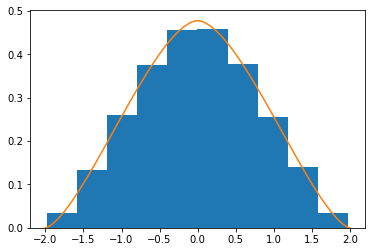

In [113]:
x_values = np.linspace(a, b, 1000)
y_values = [fx(i) for i in x_values]
plt.hist(x, density=True)
plt.plot(x_values, y_values)
plt.show()

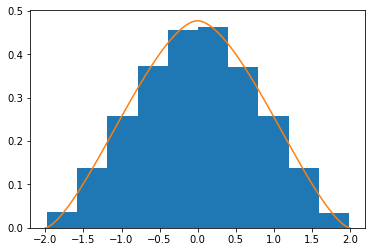

In [114]:
x_values = np.linspace(a, b, 1000)
y_values = [fy(i) for i in x_values]
plt.hist(y, density=True)
plt.plot(x_values, y_values)
plt.show()

Вычислить теоретические, точечные и интервальные значения характеристик
двумерной НСВ (математическое ожидание, дисперсия, корреляция);

1. Точенчные:

In [115]:
print('M(x)=',np.mean(x))
print('D(x)=',np.var(x))
print('M(y)=',np.mean(y))
print('D(y)=',np.var(y))
print('r(xy)=',spst.pearsonr(x, y)[0])

M(x)= -0.000999753683148592
D(x)= 0.6002023267737059
M(y)= 0.003103138374022833
D(y)= 0.6037650410624766
r(xy)= 0.002777847287230024


2. Теоретические

In [116]:
def xfx(x):
    return x * fx(x)

Mx = spint.quad(xfx, a, b)[0]

def yfy(y):
    return y * fy(y)

My = spint.quad(yfy, a, b)[0]

def y2fy(y):
    return y * y * fy(y)

Dy = spint.quad(y2fy, a, b)[0] - My ** 2

def x2fx(x):
    return x * x * fx(x)

Dx = spint.quad(x2fx, a, b)[0] - Mx ** 2

def xyfxy(x,y):
    return x * y * fxy(x, y)

Mxy = spint.dblquad(xyfxy, a, b, lambda x: -np.sqrt(4 - x ** 2), lambda x: np.sqrt(4 - x ** 2))[0]
rxy = (Mxy - Mx * My) / (np.sqrt(Dx) * np.sqrt(Dy))

print('M(x)=',Mx)
print('D(x)=',Dx)
print('M(y)=',My)
print('D(y)=',Dy)
print('r(xy)=',rxy)

M(x)= 0.0
D(x)= 0.5999999999999691
M(y)= 0.0
D(y)= 0.5999999999999691
r(xy)= 0.0


3. Интервальные

In [117]:
def get_interval(Dx, alpha, array):
    left =  len(array) * Dx / spst.chi2.ppf(1 - alpha/2, df=len(array)-1)
    right = len(array) * Dx / spst.chi2.ppf(alpha/2, df=len(array)-1)
    return left, right

def z_to_r(z):
    '''Преобразование z-оценки обратно в r-значение'''
    return (np.exp(z*2) - 1) / (np.exp(z*2) + 1)

def interval(x,y, alpha):
    r = spst.pearsonr(x,y)[0]
    zr = 0.5 * np.log((1 + r) / (1 - r)) 
    crit = spst.norm.ppf(1-alpha/2)
    sez = 1 / np.sqrt(len(x) - 3)
    return (z_to_r(zr - (crit * sez))), (z_to_r(zr + (crit * sez)))

print("Интервал для Mx:", spst.t.interval(0.99, len(x)-1, loc=np.mean(x), scale=spst.sem(x)))
print("Интервал для Dx", get_interval(Dx, 0.01, x))
print("Интервал для My:", spst.t.interval(0.99, len(y)-1, loc=np.mean(y), scale=spst.sem(y)))
print("Интервал для Dy", get_interval(Dy, 0.01, y))
print("Интервал для Rxy:",interval(x, y, 0.1))

Интервал для Mx: (-0.0073104368710100835, 0.005310929504712899)
Интервал для Dx (0.5931509073483929, 0.6069752583105561)
Интервал для My: (-0.003226246753685874, 0.00943252350173154)
Интервал для Dy (0.5931509073483929, 0.6069752583105561)
Интервал для Rxy: (-0.0024237027245824264, 0.007979246986673212)


Задание 2

In [118]:
x = [20, 30, 40, 50, 70]
y = [3, 4, 5, 9, 10]

n = len(x)
m = len(y)


P = [[0.01, 0.04, 0.02, 0.05, 0.03],
     [0.01, 0.3, 0.03, 0.03, 0.02],
     [0.02, 0.06, 0.06, 0.04, 0.01],
     [0.02, 0.03, 0.07, 0.02, 0.01],
     [0.01, 0.01, 0.05, 0.03, 0.02]]

In [119]:
def dsv_gen(x, y, P):
    p_x = [sum(row) for row in P]
    p_x_values = np.cumsum(p_x)

    p_yx = np.copy(P)
    for i in range(len(p_yx)):
        for j in range(len(p_yx[0])):
            p_yx[i][j] /= p_x[i]

    p_yx_values = np.copy(p_yx)
    for i in range(len(p_yx_values)):
        p_yx_values[i] = np.cumsum(p_yx_values[i])

    ind_x = 0
    ind_y = 0
    
    while True:
        e = random.random()
        for i in range(len(p_yx_values)):
            if e <= p_x_values[i]:
                ind_x = i
                break

        e = random.random()
        for i in range(len(p_yx_values[0])):
            if e <= p_yx_values[ind_x][i]:
                ind_y = i
                break

        yield ind_x, ind_y


def get_values(x_val, y_val, n):
    x, y =[], []
    gen = dsv_gen(x_val, y_val, P)
    for i in range(n):
        val = next(gen)
        x.append(x_val[val[0]])
        y.append(y_val[val[1]])
    return x, y

In [120]:
N = 10000
vals = get_values(x, y, N)
x_values = vals[0]
y_values = vals[1] 

Проверить составляющие двумерной ДСВ на независимость

In [121]:
def wrapper(P, n, m):
    p_x = [sum(row) for row in P]
    p_y = [sum([val[i] for val in P]) for i in range(m)]    
    for i in range(n):
        for j in range(m):
            if P[i][j] != p_x[i]*p_y[j]:
                print('X,Y зависимы')
                print(f'P[{i}][{j}] != p_x[{i}]*p_y[{j}]')
                print(f'{P[i][j]} != {p_x[i]*p_y[j]}')
                return
    print('X,Y независимы')
wrapper(P, n,m)

X,Y зависимы
P[0][0] != p_x[0]*p_y[0]
0.01 != 0.0105


Найти условные плотности распределения;

In [122]:
p_x = [sum(row) for row in P]
p_y = [sum([val[i] for val in P]) for i in range(m)]    

p_yx = np.copy(P)
for i in range(n):
    for j in range(m):
        p_yx[i][j] /= p_x[i]

print(p_yx)


p_xy = np.copy(P)
for i in range(n):
    for j in range(m):
        p_xy[i][j] /= p_y[j]
    
print(p_xy)

[[0.06666667 0.26666667 0.13333333 0.33333333 0.2       ]
 [0.02564103 0.76923077 0.07692308 0.07692308 0.05128205]
 [0.10526316 0.31578947 0.31578947 0.21052632 0.05263158]
 [0.13333333 0.2        0.46666667 0.13333333 0.06666667]
 [0.08333333 0.08333333 0.41666667 0.25       0.16666667]]
[[0.14285714 0.09090909 0.08695652 0.29411765 0.33333333]
 [0.14285714 0.68181818 0.13043478 0.17647059 0.22222222]
 [0.28571429 0.13636364 0.26086957 0.23529412 0.11111111]
 [0.28571429 0.06818182 0.30434783 0.11764706 0.11111111]
 [0.14285714 0.02272727 0.2173913  0.17647059 0.22222222]]


Построить гистограммы составляющих двумерной ДСВ;

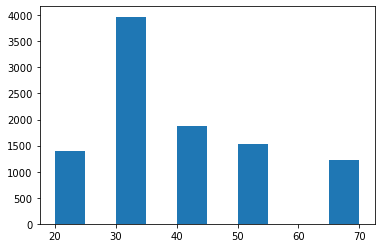

In [123]:
plt.hist(x_values)
plt.show()

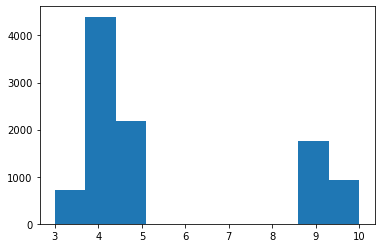

In [124]:
plt.hist(y_values)
plt.show()

Вычислить теоретические, точечные и интервальные значения характеристик
двумерной ДСВ (математическое ожидание, дисперсия, корреляция);

In [125]:
def M(x, p_x):
    sum = 0
    for i in range(len(x)):
        sum += x[i] * p_x[i]
    return sum

def D(x, p_x):
    sum = 0
    for i in range(len(x)):
        sum += (x[i] ** 2) * p_x[i]
    m = M(x, p_x)
    return sum - m ** 2

def R(x, y, P):
    Mxy = 0
    for i, x_v in enumerate(x):
        for j, y_v in enumerate(y):
            Mxy += x_v * y_v * P[i][j]
    Mx = M(x, p_x)
    My = M(y, p_y)
    Dx = D(x, p_x)
    Dy = D(y, p_y)        
    return (Mxy - Mx * My) / np.sqrt(Dx * Dy)

In [126]:
p_x = [sum(row) for row in P]
p_y = [sum([val[i] for val in P]) for i in range(m)] 

1. Теоретические

In [127]:
Mx = M(x, p_x)
My = M(y, p_y)
Dx = D(x, p_x)
Dy = D(y, p_y)
Rxy = R(x, y, P)

print('M(x)=',Mx)
print('D(x)=',Dx)
print('M(y)=',My)
print('D(y)=',Dy)
print('r(xy)=',Rxy)

M(x)= 38.2
D(x)= 218.75999999999976
M(y)= 5.55
D(y)= 5.387499999999999
r(xy)= 0.0725306798362474


In [128]:
p_x_exp = [x_values.count(x[i]) / N for i in range(n)]
p_y_exp = [y_values.count(y[i]) / N for i in range(m)]

2. Точечные

In [129]:
Mx = M(x, p_x_exp)
My = M(y, p_y_exp)
Dx = D(x, p_x_exp)
Dy = D(y, p_y_exp)
Rxy = spst.pearsonr(x_values, y_values)[0]

print('M(x)=',Mx)
print('D(x)=',Dx)
print('M(y)=',My)
print('D(y)=',Dy)
print('r(xy)=',Rxy)

M(x)= 38.436
D(x)= 218.7939040000001
M(y)= 5.5816
D(y)= 5.52014144
r(xy)= 0.09914594818652134


3. Интервальные

In [130]:
print("Интервал для Mx:", spst.t.interval(0.99, len(x_values)-1, loc=np.mean(x_values), scale=spst.sem(x_values)))
print("Интервал для My:", spst.t.interval(0.99, len(y_values)-1, loc=np.mean(y_values), scale=spst.sem(y_values)))
print("Интервал для Dx", get_interval(Dx, 0.01, x_values))
print("Интервал для Dy", get_interval(Dy, 0.01, y_values))
print("Интервал для Rxy:",interval(x_values, y_values, 0.1))

Интервал для Mx: (38.054899679246745, 38.817100320753255)
Интервал для My: (5.521066357397661, 5.642133642602339)
Интервал для Dx (211.04812466326112, 226.9999947486689)
Интервал для Dy (5.324716445426894, 5.7271800309935)
Интервал для Rxy: (0.0828315181905016, 0.1154072503142862)
